# Cvičení 5 - Lineární regrese

V tomto cvičení se budeme zabývat modelem lineární regrese.

## Stručný úvod do lineární algebry v numpy

Než se pustíme do modelu lineární regrese, podívejme se na práci s poli, maticemi a vektory v [NumPy](https://numpy.org/).

NumPy je efektivní knihovna pro práci s numerickými daty ve formě tenzorů (vícerozměrných polí). 

NumPy používá homogenní pole –⁠ všechny položky mají stejný datový typ a také má pevnou velikost. 

Několik užitečných odkazů:

- Kompletní úvod do NumPy: https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54
- Vizuální ukázka práce s NumPy: https://medium.com/@yp7121/a-visual-intro-to-numpy-2903458d25ea
- Cheatsheet na jednotlivé funkce: https://pyvec.github.io/cheatsheets/numpy/numpy-cs.pdf

NumPy se standardně importuje jako `np`, (ale neomezuje vás to od toho si tento alias pojmenovat, jak chcete).

In [2]:
import numpy as np

### NumPy array

NumPy pole, `ndarray`, je N-dimenzionální tensor. 

Nejjednodušší cesta, jak vytvořit ndarray je vytvořit ho z listu.

In [3]:
# ndarray, n=1
a = np.array([1, 2, 3])
print(a)
print("="*80,'\n')

# ndarray, n=2
b = np.array([[1, 2], [5, 3], [4, 6]])
print(b)
print(type(b), b.dtype)
print("="*80,'\n')

# můžeme také nastavit datový typ, pokud potřebujeme
c = np.array(b, dtype=np.float64)
print(c)
print(type(b), b.dtype)

[1 2 3]

[[1 2]
 [5 3]
 [4 6]]
<class 'numpy.ndarray'> int64

[[1. 2.]
 [5. 3.]
 [4. 6.]]
<class 'numpy.ndarray'> int64


Další možností je vytvoření `ndarray` speciálních typů (např. samé nuly, jednotkové matice, atd.). 

Argumentem následujících funkcí býva shape nového `ndarray`.

In [4]:
# ndarray plné nul
print(np.zeros((2, 3))) 
print("="*80,'\n')

# ndarray plné jedniček
print(np.ones((2, 3))) 
print("="*80,'\n')

# ndarray plné logických true
a = np.ones((2, 3), dtype = bool)
print(a) 
print(a.dtype)
print("="*80,'\n')

# vytvoří ndarray s random čísly s rozsahem mezi 0 a 1
# pokud byste chtěli jiný rozsah, použijte google.
# např. se může hodit https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.uniform.html
print(np.random.random((2, 3))) 
print("="*80,'\n')

# vytvoří ndarray s jedničkami na diagonále. Podívejte se na parametr k
print(np.eye(3, 4)) 

[[0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]]

[[ True  True  True]
 [ True  True  True]]
bool

[[0.8288861  0.61862906 0.33261981]
 [0.00807982 0.8959708  0.46674067]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


Pokud pracujeme s maticemi (odpovídající `ndarray` by bylo dvourozměrné), tak pro ulehčení práce může být výhodné je převést je na `np.matrix`.

V takovou chvíli je malinko snazší zápis maticových operací (s `ndarray` to ale lze udělat vše také).

Pozor, že NumPy matice `matrix` jsou striktně 2-dimenzionální!

In [5]:
# Normální numpy array
a1 = np.array([[1,2],[3,4]])
a2 = np.array([[2,3],[4,5]])

# NumPy matrix
m1 = np.matrix(a1)
m2 = np.matrix([[2,3],[4,5]])

print(m1)
print(type(m1), m1.dtype)
print("="*80, '\n')

# nasobeni skalarem je stejné u ndarray i u matrix
print('Násobení číslem')
print(a1 * 8)
print(m1 * 8)

[[1 2]
 [3 4]]
<class 'numpy.matrix'> int64

Násobení číslem
[[ 8 16]
 [24 32]]
[[ 8 16]
 [24 32]]


U maticových operací již budou rozdíly.

**Operátor * se u `matrix` chová jako maticové násobení, u `ndarray` je to násobení po složkách!**

In [6]:
a1 = np.array([[1,2],[3,4]])
a2 = np.array([[2,3],[4,5]])
# nasobeni matic u np.matrix
print('Násobení matic pomocí *')
print(m1*m2)

# obyčejné násobení prvek krát prvek u ndarray
print('Násobení v ndarray po prvcích pomocí *')
print(a1*a2)
print("="*80, '\n')

# maticové násobení u ndarray
print('Maticové násobení v ndarray pomocí @')
print(a1@a2)
print("="*80, '\n')

# taktéž funguje pro np.matrix
print('Maticové násobení pomocí @ funguje i u matrix')
print(m1@m2)
print("="*80, '\n')

Násobení matic pomocí *
[[10 13]
 [22 29]]
Násobení v ndarray po prvcích pomocí *
[[ 2  6]
 [12 20]]

Maticové násobení v ndarray pomocí @
[[10 13]
 [22 29]]

Maticové násobení pomocí @ funguje i u matrix
[[10 13]
 [22 29]]



- Funkce maticového násobení, která funguje vždy je v numpy ve funkci `np.dot`. 
- Funkce násobení po složkách je ve funkci `np.multiply`.

In [7]:
# případně se dá násobit přes
print('Pro maticové násobení lze použít funkci np.dot')
print(np.dot(a1, a2))
print(np.dot(m1, m2))
print("="*80, '\n')

# případně se dá násobit přes
print('Pro maticové násobení lze použít funkci np.multiply')
print(np.multiply(a1, a2))
print(np.multiply(m1, m2))

Pro maticové násobení lze použít funkci np.dot
[[10 13]
 [22 29]]
[[10 13]
 [22 29]]

Pro maticové násobení lze použít funkci np.multiply
[[ 2  6]
 [12 20]]
[[ 2  6]
 [12 20]]


Matice a ndarray se dají snadno transponovat.

In [8]:
print("Originální:\n", a1)
print("Transponované (.T):\n", a1.T)
print("Transponované (.transpose()):\n", a1.transpose())
print("Transponované (np.transpose()):\n", np.transpose(a1))
print("="*80, '\n')

print("Transponované (matrix, .T):\n", m1.T)
print("Transponované (matrix, .transpose()):\n", m1.transpose())
print("Transponované (matrix, np.transpose()):\n", np.transpose(m1))

Originální:
 [[1 2]
 [3 4]]
Transponované (.T):
 [[1 3]
 [2 4]]
Transponované (.transpose()):
 [[1 3]
 [2 4]]
Transponované (np.transpose()):
 [[1 3]
 [2 4]]

Transponované (matrix, .T):
 [[1 3]
 [2 4]]
Transponované (matrix, .transpose()):
 [[1 3]
 [2 4]]
Transponované (matrix, np.transpose()):
 [[1 3]
 [2 4]]


Pro zjisštění velikosti v numpy existuje několik funkcí.

In [9]:
# rozměry (shape), dimenzi (ndim) a velikost (size)
a3 = np.random.random((2,2,3))

print(a3, '\n')

print('Shape', a3.shape)
print('ndim', a3.ndim)  
print('size', a3.size)

[[[0.66002142 0.92809224 0.02388149]
  [0.30919325 0.99670424 0.01918391]]

 [[0.33596839 0.69804446 0.00696526]
  [0.18480759 0.84227733 0.62412788]]] 

Shape (2, 2, 3)
ndim 3
size 12


V numpy funguje dle očekávání slicing a indexing.

In [10]:
a5 = np.random.random((3,4))
print(a5.shape)
print("="*80, '\n')
print(a5)
print("="*80, '\n')
print(a5[1:, 2:]) # od řádku 1 a dál, sloupce 2 a dál (indexujeme od nuly)
print("="*80, '\n')
print(a5[:, :-1]) # všechny řádky, všechny sloupce kromě posledního

(3, 4)

[[0.183606   0.01876206 0.24502071 0.76386934]
 [0.19751392 0.04078887 0.12750112 0.77792954]
 [0.79771417 0.53233805 0.90691412 0.14979029]]

[[0.12750112 0.77792954]
 [0.90691412 0.14979029]]

[[0.183606   0.01876206 0.24502071]
 [0.19751392 0.04078887 0.12750112]
 [0.79771417 0.53233805 0.90691412]]


Další dvě šikovné funkce jsou `flatten` a `ravel`, které _zplošťují_ pole.

In [11]:
a4 = np.array([[1,2],[3,4],[5,6]])

print(a4)
print(a4.shape)
print("="*80)

# flatten nam vytvori novy objekt a "narovna" nam ndarray jako 1D pole. Deep copy.
f1 = a4.flatten()
print("a4 flatten:\n", f1)
print("="*80)

# ravel nam novy objekt nevytvari, ale funguje jako shallow copy. Jinak funguje stejne jako flatten
r1 = a4.ravel()
print("a4 ravel:\n", r1)
print("="*80)

a4[0,0] = 555
print("a4 se zmenilo:\n", a4)
print("f1 se nezmenilo:\n", f1)
print("r1 se zmenilo:\n", r1)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)
a4 flatten:
 [1 2 3 4 5 6]
a4 ravel:
 [1 2 3 4 5 6]
a4 se zmenilo:
 [[555   2]
 [  3   4]
 [  5   6]]
f1 se nezmenilo:
 [1 2 3 4 5 6]
r1 se zmenilo:
 [555   2   3   4   5   6]


Dále si ukažme `reshape`, které se může hodit při přípravě dat. Všimněte si užití -1.

In [12]:
# to se může hodit, když někdy s tím chcete pracovat jak n-dimenzionální pole a někdy jako 1D pole.
# zpátky (nebo do jiného shape) si s tím můžete pohrát pomocí příkazu reshape (který dává smysl)
print('Originál:', r1, '\n')
for r in [(1,6), (2,3), (3,2), (6,1), (-1,1), (2,-1)]:
    print(f"Reshape {r}:")
    print(r1.reshape(r),'\n')


Originál: [555   2   3   4   5   6] 

Reshape (1, 6):
[[555   2   3   4   5   6]] 

Reshape (2, 3):
[[555   2   3]
 [  4   5   6]] 

Reshape (3, 2):
[[555   2]
 [  3   4]
 [  5   6]] 

Reshape (6, 1):
[[555]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]] 

Reshape (-1, 1):
[[555]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]] 

Reshape (2, -1):
[[555   2   3]
 [  4   5   6]] 



Spojování polí můžeme dělat pomocí `np.concatenate`.

In [13]:
a = np.array([[1,2],[3,4],[5,6]])
print('a = ', a,'\n')

b = np.ones((a.shape[0],1))
print('b = ', b,'\n')

c = np.concatenate((a,b), axis = 1)
print('Vektor b přilepený za matici a:')
print(c,'\n')

c = np.concatenate((a,b[:2].T), axis = 0)
print('První 2 prvky vektoru b, transponovány a přilepeny pod matici a:')
print(c)

a =  [[1 2]
 [3 4]
 [5 6]] 

b =  [[1.]
 [1.]
 [1.]] 

Vektor b přilepený za matici a:
[[1. 2. 1.]
 [3. 4. 1.]
 [5. 6. 1.]] 

První 2 prvky vektoru b, transponovány a přilepeny pod matici a:
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [1. 1.]]


## Lineární regrese

Pojďme se nyní konečně věnovat modelu lineární regrese. Nejprve si načteme další potřebné knihovny.

In [14]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# nastavení počtu vypisovaných cifer z numpy
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)

### Dataset

Využijeme data ze serveru Kaggle o cenách domů v oblasti Bostonu v USA [více info zde](https://www.kaggle.com/c/boston-housing).

Data jsou již vyčištěná. Proměnná, kterou chceme predikovat je `medv`.

In [15]:
df = pd.read_csv('boston.csv')
print('Shape', df.shape)
df.head()

Shape (333, 15)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Příprava trénovací a validační množiny

Opět použijeme [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ze `scikit-learn`.

Testovací množinu nebudeme vytvářet, protože nás nyní finální chyba modelu nebude zajímat.

In [16]:
random_seed = 42

Xtrain, Xval, ytrain, yval = train_test_split(df.drop(columns = ['medv']), df['medv'], test_size=0.4, random_state=random_seed)
Xval, Xtest, yval, ytest = train_test_split(Xval, yval, test_size=0.3, random_state=random_seed)

print(f"Train rozměry, X: {Xtrain.shape}, y: {ytrain.shape}")
print(f"Val rozměry, X: {Xval.shape}, y: {yval.shape}")
print(f"Test rozměry, X: {Xtest.shape}, y: {ytest.shape}")

Train rozměry, X: (199, 14), y: (199,)
Val rozměry, X: (93, 14), y: (93,)
Test rozměry, X: (41, 14), y: (41,)


## Úkol - proveďte metodu nejmenších čtverců ručně

Používejte pouze maticové operace v [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html).

* Vypočtěte odhad $\hat{\boldsymbol w}_{OLS} = (\mathbf{X}^T \mathbf X)^{-1} \mathbf X^T \boldsymbol Y$, uložte ho do proměnné `w_hat` a vypište jednotlivé koeficienty. Který z nich je intercept? 
* Spočtěte hodnotu $\text{RSS}(\hat{\boldsymbol w}_{OLS}) = \lVert \boldsymbol Y - \mathbf X \boldsymbol w \rVert^2$.
* Nakreslete scatter plot hodnot $Y_i$ a $\hat Y_i$ pro validační množinu.
* Pro validační data proveďte predikce $\hat Y_i$ a porovnejte je se skutečnými hodnotami $Y_i$.
Jako míru porovnání použijte RMSE - root mean squared error definovanou pomocí vztahu $\text{RMSE} = \sqrt{\sum_{i}(Y_i - \hat Y_i)^2}$. Opět použijeme implementaci [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)


w_hat =  [[ 36.59171  -0.0056   -0.06179   0.06238  -0.07662   5.65933 -10.94482
    3.43289  -0.01942  -1.85337   0.42811  -0.01343  -0.68126   0.00739
   -0.65277]]

Ověření normální rovnice:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Intercept, w_0 =  [[36.59171]]
Ostatní koeficienty:  [[ -0.0056   -0.06179   0.06238  -0.07662   5.65933 -10.94482   3.43289
   -0.01942  -1.85337   0.42811  -0.01343  -0.68126   0.00739  -0.65277]]

RSS =  4944.209853119575
RSS spočítané napřímo =  [[4944.20985]]


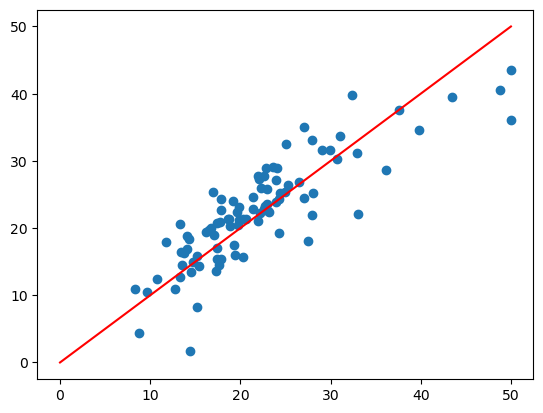

RMSE: 4.475179618128924


In [17]:
# Váš kód zde

# Matice X
# - nejprve musíme přidat sloupec jedniček !!!
XX = np.matrix(np.concatenate([np.ones((Xtrain.shape[0],1)),np.array(Xtrain)], axis = 1))

# Vektor Y
YY = np.matrix(ytrain).T

# Odhad pomocí vzorečku
w_hat = (XX.T*XX).I * XX.T*YY
print('w_hat = ', w_hat.T)

# Je řešením normální rovnice
print('\nOvěření normální rovnice: ',(XX.T*XX*w_hat - XX.T*YY).flatten())

print('\nIntercept, w_0 = ', w_hat[0])
print('Ostatní koeficienty: ', w_hat[1:].flatten())

# Hodnota RSS
RSS = np.linalg.norm(YY - XX*w_hat)**2
print('\nRSS = ', RSS)
print('RSS spočítané napřímo = ', (YY - XX*w_hat).T*(YY - XX*w_hat))

# Matice X odpovídající validační množině
XXv = np.matrix(np.concatenate([np.ones((Xval.shape[0],1)),np.array(Xval)], axis = 1))

# Predikce pro validační množinu
Yv_hat = XXv*w_hat
Yv_h = np.array(Yv_hat).flatten()

# scatter plot
plt.scatter(yval, Yv_h)
plt.plot([0,50], [0,50], 'r')
plt.show()

from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(yval, Yv_h, squared = False)
print('RMSE:', RMSE)

## Úkol - zopakujte metodu nejmenších čtverců s využitím scikit-learn

* Zopakujte postup z předchozího bodu s využitím třídy [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) ze `scikit-learn`.
* Porovnejte výsledky s předchozím manuálním přístupem.

[ -0.0056   -0.06179   0.06238  -0.07662   5.65933 -10.94482   3.43289
  -0.01942  -1.85337   0.42811  -0.01343  -0.68126   0.00739  -0.65277]
36.59170748703169


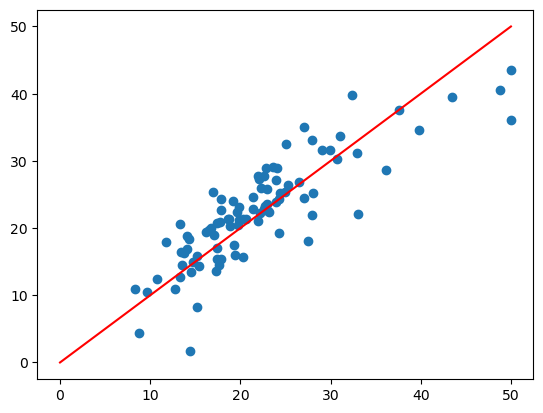

RMSE: 4.4751796181289265


In [18]:
# Váš kód zde


from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(Xtrain,ytrain)

print(clf.coef_)
print(clf.intercept_)

Yth = clf.predict(Xval)
plt.scatter(yval, Yth)
plt.plot([0,50], [0,50], 'r')
plt.show()

print('RMSE:', np.sqrt(mean_squared_error(np.array(yval), Yth)))

In [19]:
print('Rozdíl koeficientů:')
print(np.array(w_hat[1:]).flatten() - clf.coef_, '\n')

print('Rozdíl interceptů:')
print(np.array(w_hat[0:])[0][0] - clf.intercept_)

Rozdíl koeficientů:
[ 0. -0.  0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0.] 

Rozdíl interceptů:
-4.654054919228656e-12


**Vidíme, že je výsledek stejný!**

## Úkol - sledujte vliv lineárních transformací příznaků 

Nejprve si teoreticky ukažte, že lineární regrese je (teoreticky) invariantní vůči lineárním transformacím příznaků.

Lineární transformací příznaku $X_i$ myslíme vytvoření nového příznaku $\tilde X_i = a_i + b_i X_i$, kde $a_i$ a $b_i \neq 0$ jsou nějaké konstanty.

Jestliže pro každé $i = 1, \dotsc, p$ označíme $a_i$ a $b_i$ koeficienty použité při transformaci $i$ tého příznaku, dokažte, že vztah pro přepočet odpovídajícího vektoru koeficientů $\boldsymbol w$ je 
$$
\tilde{\boldsymbol w} = \begin{pmatrix}
1&-\frac{a_1}{b_1} & \dotsi & -\frac{a_p}{b_p}\\
0 & \frac{1}{b_1}& 0 & \dotsi\\
\vdots & \vdots & \ddots  & \vdots\\
0 & \dotsi & 0 & \frac{1}{b_p}
\end{pmatrix}
\boldsymbol w.
$$

Odvoďte dále vztah 
$$
\tilde{\mathbf{X}} = 
\mathbf{X}
\begin{pmatrix}
0 & 0 & 0 & \dotsc\\
0 & b_1 & 0 & \dotsc\\
\vdots & \vdots & \ddots  & \vdots\\
\dots & 0 & 0 & b_p
\end{pmatrix}
+
\begin{pmatrix}
1 & a_1 & \dotsi & a_p\\
1 & a_1 & \dotsi & a_p\\
\vdots & \vdots & \ddots  & \vdots\\
1 & a_1 & \dotsi & a_p
\end{pmatrix},
$$
kde $\mathbf{X} \in \mathbb R^{N, p+1}$ je matice příznaků pro trénovací množinu a $\tilde{\mathbf{X}} \in \mathbb R^{N, p+1}$ je matice transformovaných příznaků pro trénovací množinu (v obou případech je první sloupec konstantně roven $1$).

Nakonec ukažte $\tilde{\mathbf{X}} \tilde{\boldsymbol w} = \mathbf{X} \boldsymbol{w}$ a rozmyslete si, že z toho plyne, že pro každé $\boldsymbol{w}$, které minimalizuje $\text{RSS}_{\mathbf{X}}(\boldsymbol{w})$, odpovídající $\tilde{\boldsymbol w}$ minimalizuje $\text{RSS}_{\tilde{\mathbf{X}}}(\boldsymbol{w})$.

Na aktuálním datasetu dále zkuste u vybraných příznaků provést lineární transformaci (můžete udělat třeba Standardizaci) a ověřte, že po natrénování dostanete vektor koeficientů stejný, jako výše odvozeným výpočtem s pomocí koeficientů z provedené lineární transformace.

In [20]:
# Váš kód zde

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

Xtiltrain = Xtrain.copy()
Xtiltrain.loc[:,:] = scaler.transform(Xtrain)

Xtilval = Xval.copy()
Xtilval.loc[:,:] = scaler.transform(Xval)

# zjistíme koeficienty a_i a b_i
transf_coefs = pd.DataFrame(Xtrain.columns).set_index(0)
transf_coefs["b"] = np.power(scaler.scale_, -1)
transf_coefs["Ib"] = scaler.scale_
transf_coefs["a"] = - scaler.mean_/scaler.scale_

display(transf_coefs)

# Ověřme, že se jedná opravdu o ty koeficienty lineární transformace
display(Xtrain["crim"] * transf_coefs.loc['crim','b'] + transf_coefs.loc['crim','a'])
display(Xtiltrain["crim"])
# - vidíme, že to je stejné!


# vypočet tilde koeficientů
coefsn = np.multiply(clf.coef_, transf_coefs.Ib.values)
interceptn = clf.intercept_ - np.dot(clf.coef_,np.multiply(transf_coefs.Ib.values,transf_coefs.a.values))

print('\nRučně spočtené parametry w_1,...,w_p:')
print(coefsn)
print('Ručně spočtený intercept: ', interceptn)


clf_std = LinearRegression()
clf_std.fit(Xtiltrain,ytrain)

print('\nParametry w_1,...,w_p z LinearRegression:')
print(clf_std.coef_)
print('Intercept z LinearRegression: ', clf_std.intercept_)

# - Vidíme, že jsou ty koeficienty w stejné!!!

,b,Ib,a
0,,,
ID,0.006879,145.365013,-1.776502
crim,0.128132,7.804476,-0.452880
zn,0.039958,25.026155,-0.498473
indus,0.143883,6.950093,-1.585807
chas,4.376005,0.228519,-0.241890
nox,8.274083,0.120859,-4.598432
rm,1.452358,0.688535,-9.151740
age,0.034168,29.266937,-2.243549
dis,0.484210,2.065218,-1.833180


23    -0.448576
37    -0.451045
246    0.606416
67    -0.433832
266    0.495792
         ...   
188   -0.445027
71    -0.430944
106   -0.280820
270    2.870931
102   -0.240617
Name: crim, Length: 199, dtype: float64

23    -0.448576
37    -0.451045
246    0.606416
67    -0.433832
266    0.495792
         ...   
188   -0.445027
71    -0.430944
106   -0.280820
270    2.870931
102   -0.240617
Name: crim, Length: 199, dtype: float64


Ručně spočtené parametry w_1,...,w_p:
[-0.81462 -0.48225  1.56115 -0.53251  1.29326 -1.32278  2.36367 -0.56828
 -3.82762  3.83075 -2.33304 -1.41547  0.65023 -4.69718]
Ručně spočtený intercept:  23.311557788944725

Parametry w_1,...,w_p z LinearRegression:
[-0.81462 -0.48225  1.56115 -0.53251  1.29326 -1.32278  2.36367 -0.56828
 -3.82762  3.83075 -2.33304 -1.41547  0.65023 -4.69718]
Intercept z LinearRegression:  23.311557788944725


## Úkol - zkoumejte vliv lineární nezávislosti slopců matice Xtrain na model

* Vytvořte nový příznak, který bude lineární kombinací ostatních (např. součtem _age_ a _tax_).
  Tím vytvoříme problém kolinearity.
* Podívejte se, jaký odhad $\hat{\boldsymbol w}$ vám vrátí `LinearRegression` ze `sklearn`.
* Podívejte se, jaké je pro toto řešení RSS a jaké je RMSE na validační množině.
* Ověřte, zda je tento vektor (když ho spojíte s interceptem) řešením normální rovnice $\mathbf{X}^T\mathbf X \boldsymbol w - \mathbf X^T \boldsymbol Y = \boldsymbol 0$.
* Pokud ne, najděte alespoň jedno řešení s využitím `numpy.linalg.pinv`.
* Podívejte se, jaké je pro toto řešení RSS a jaké je RMSE na validační množině.
* Zkuste nalézt nějaké další řešení normální rovnice $\hat{\boldsymbol  w}^*$ (využijte `scipy.linalg.null_space`). Podívejte se jaké je pro toto řešení RSS a jaké je RMSE na validační množině.

Parametry w_1,...,w_p z LinearRegression:
[ -0.0056   -0.06179   0.06238  -0.07662   5.65933 -10.94482   3.43289
  -0.00847  -1.85337   0.42811  -0.00248  -0.68126   0.00739  -0.65277
  -0.01095]
Intercept z LinearRegression:  36.59170748703115


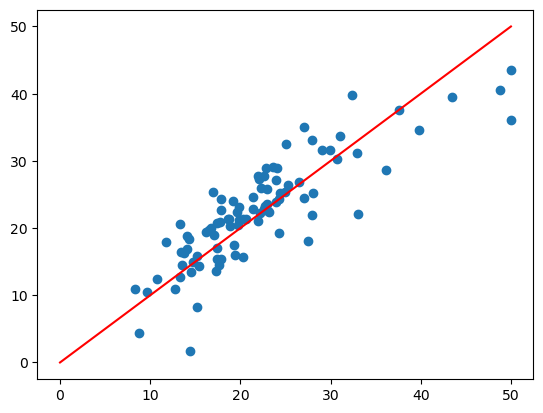


val RMSE z LinearRegression: 4.475179618128922

Normální rovnice pro řešení LinearRegression:
[[ 0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0.]]
RSS z LinearRegression =  4944.209853119575

Originální: RSS = 4944.209853119575, RMSE = 4.475179618128924

Odhad w_0, w_1,...,w_p s pomocí pseudoinverze:
[[ 36.59171  -0.0056   -0.06179   0.06238  -0.07662   5.65933 -10.94482
    3.43289  -0.00847  -1.85337   0.42811  -0.00248  -0.68126   0.00739
   -0.65277  -0.01095]]

Normální rovnice pro řešení pomocí pseudoinverze:
[[ 0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]]
RSS z pseudoinverze =  4944.209853119573

Rozdíl v koeficientech:
[[ 0.  0. -0. -0.  0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0.]]


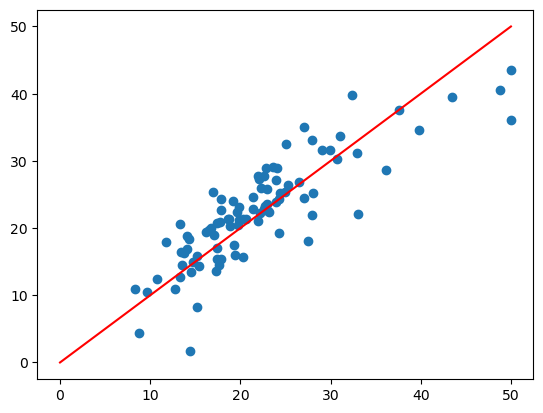

RMSE z pseudoinverze: 4.475179618136975


In [21]:
# Váš kód zde

Xtrain_new = Xtrain.copy()
Xtrain_new["new"] = Xtrain_new["age"] + Xtrain_new["tax"]
Xval_new = Xval.copy()
Xval_new["new"] = Xval_new["age"] + Xval_new["tax"]
Xtest_new = Xtest.copy()
Xtest_new["new"] = Xtest_new["age"] + Xtest_new["tax"]

# Xtrain_new.head(15)

# Nejdříve zkusíme knihovnu
clf_new = LinearRegression()
clf_new.fit(Xtrain_new,ytrain)

print('Parametry w_1,...,w_p z LinearRegression:')
print(clf_new.coef_)
print('Intercept z LinearRegression: ', clf_new.intercept_)

# Uložíme si vektor parametrů z LinearRegression
wn_hat2 = np.zeros((Xtrain_new.shape[1]+1,))
wn_hat2[0] = clf_new.intercept_
wn_hat2[1:] = clf_new.coef_
wn_hat2 = np.matrix(wn_hat2.reshape(-1,1))

# Predikujeme z LinearRegression a nakreslíme scatter plot
Ytnewh = clf_new.predict(Xval_new)
plt.scatter(yval, Ytnewh)
plt.plot([0,50], [0,50], 'r')
plt.show()
print('\nval RMSE z LinearRegression:', np.sqrt(mean_squared_error(np.array(yval), Ytnewh)))

# Evidentně je to trochu horší než hodnota RMSE před tím!
# Zkusme to ručně
# Matice X
XXn = np.matrix(np.concatenate([np.ones((Xtrain_new.shape[0],1)),np.array(Xtrain_new)], axis = 1))
# Vektor Y
YY = np.matrix(ytrain).T


# Ověření splnění normální rovnice pro řešení z LinearRegression
print('\nNormální rovnice pro řešení LinearRegression:')
print((XXn.T*XXn*wn_hat2 - XXn.T*YY).flatten())
# To normální rovnici nesplní!!

# zkusíme RSS pro LinearRegression
RSSn2 = np.linalg.norm(YY - XXn*wn_hat2)**2
print('RSS z LinearRegression = ', RSSn2)

# Připomenutí orig RMSE a RSS
print(f"\nOriginální: RSS = {RSS}, RMSE = {RMSE}")

# Teď použijeme pseudoinverzi!
wn_hat = np.linalg.pinv(XXn.T*XXn) * XXn.T*YY
print("\nOdhad w_0, w_1,...,w_p s pomocí pseudoinverze:")
print(wn_hat.flatten())

# Ověření splnění normální rovnice
print('\nNormální rovnice pro řešení pomocí pseudoinverze:')
print((XXn.T*XXn*wn_hat - XXn.T*YY).flatten())
# RSS
RSSn = np.linalg.norm(YY - XXn*wn_hat)**2
print('RSS z pseudoinverze = ', RSSn)
# Vidíme, že to je stejné

# Koukneme na rozdíl v koeficientech
print("\nRozdíl v koeficientech:")
print((wn_hat - wn_hat2).flatten())

# Matice X odpovídající validační množině
XXnv = np.matrix(np.concatenate([np.ones((Xval_new.shape[0],1)),np.array(Xval_new)], axis = 1))

# Predikce pro validační množinu
Ynv_hat = XXnv*wn_hat
Ynv_h = np.array(Ynv_hat).flatten()

# scatter plot
plt.scatter(yval, Ynv_h)
plt.plot([0,50], [0,50], 'r')
plt.show()

from sklearn.metrics import mean_squared_error
print('RMSE z pseudoinverze:', mean_squared_error(yval, Ynv_h, squared = False))
# Dostali jsme stejné RMSE jako před tím!!

Rozměry null space:  (16, 1)
Vektor v null space:
[[-0.      -0.       0.      -0.      -0.      -0.      -0.       0.
   0.57735  0.      -0.       0.57735  0.       0.      -0.      -0.57735]]

Normální rovnice pro nový vektor:
[[ 0. -0.  0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0. -0.]]
RSS pro nový vektor =  4944.20985311962


(93, 1)

'\n-------'

(16, 1)

'\n-------'

(93,)

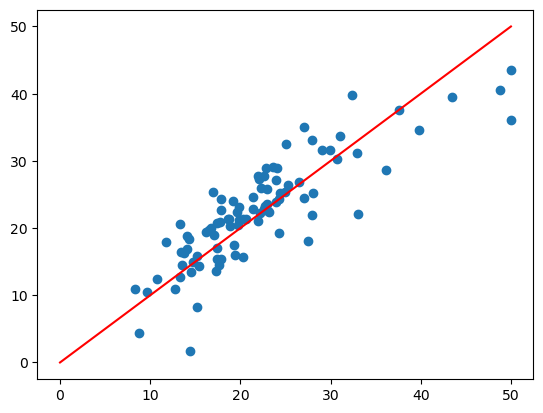

RMSE pro nový vektor: 4.475179618136881


In [27]:
# Váš kód pro nalezení dalších řešení normální rovnice
# Jedno řešení máme uložené ve wn_hat


import scipy
Z = scipy.linalg.null_space(XXnv)
print("Rozměry null space: ", Z.shape)

# vidíme, že máme právě jedno řešení
delta_wn = np.matrix(Z)
print("Vektor v null space:")
print(delta_wn.flatten())

wn_new = wn_hat + 30*delta_wn
# Ověření splnění normální rovnice
print('\nNormální rovnice pro nový vektor:')
print((XXn.T*XXn*wn_new - XXn.T*YY).flatten())
# RSS
print('RSS pro nový vektor = ', np.linalg.norm(YY - XXn*wn_new)**2)
# Predikce pro validační množinu
Ynv_new = XXnv*wn_new
Ynv_ne = np.array(Ynv_new).flatten()

display(Ynv_new.shape,"\n-------")
display(wn_new.shape,"\n-------")
display(yval.shape)

# scatter plot
plt.scatter(yval, Ynv_ne)
plt.plot([0,50], [0,50], 'r')
plt.show()

from sklearn.metrics import mean_squared_error
print('RMSE pro nový vektor:', mean_squared_error(yval, Ynv_ne, squared = False))

## Poučení! 
U lineární regrese se vyplatí zkoumat regularitu/kolinearitu. V případě, že jsou sloupce matice $\mathbf X$ lineárně závislé, je potřeba být opatrný a nevěřit 100% cizím implementacím. V takovém případě je ideální pustit se do nějaké regularizace např. pomocí hřebenové regrese, kterou budeme dělat na příštím cvičení.

**Zkuste nyní nastavit `random_seed = 1` při počátečním dělení na trénovací a validační množinu a spusťe znovu svůj kód!**